In [81]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

In [82]:
data = pd.read_csv("insurance.csv")

In [83]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [84]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [85]:
genderdummy=pd.get_dummies(data['sex'])


In [87]:
genderdummy

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


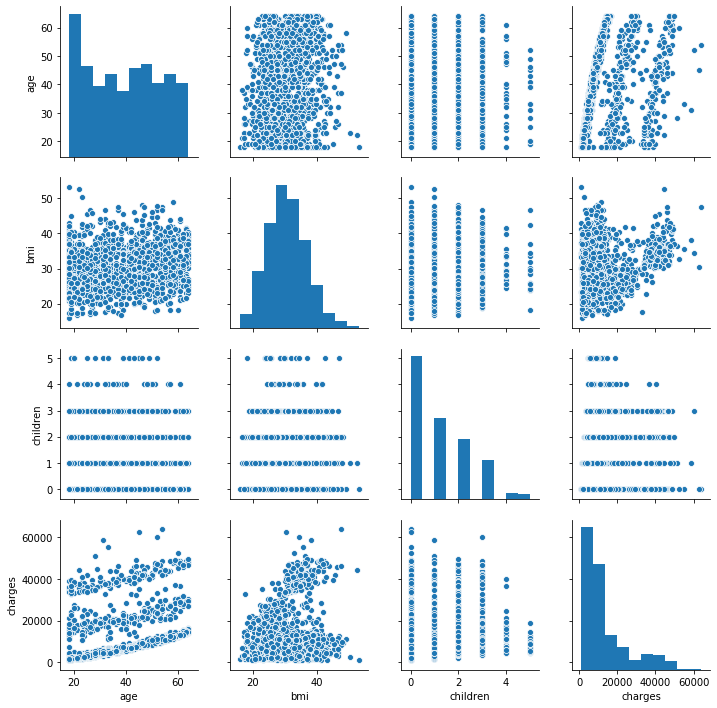

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(data)



In [75]:
data= data.drop(['smoker', 'region', 'sex'], axis =1)

In [76]:
data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [77]:
data.isnull().sum()

age         0
bmi         0
children    0
charges     0
dtype: int64

In [78]:
y = data["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [52]:
model = LinearRegression()

In [53]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [54]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
ypre = model.predict(x_train)
ypred = model.predict(x_test)

In [56]:
ypre

array([ 9288.0267 ,  7147.105  , 10702.6424 , ..., 14988.432  ,
       20177.67113,  4889.0368 ])

In [57]:
ypred

array([ 1121.8739 , 13747.87235, 14571.8908 , 10107.2206 ,  6128.79745,
        4320.41085, 11931.12525,  8515.7587 , 20984.0936 , 18806.14547,
       12495.29085,  6710.1919 , 13937.6665 , 44260.7499 ,  7742.1098 ,
       18767.7377 , 39836.519  , 12622.1795 , 11944.59435,  1631.8212 ,
       32108.66282, 14349.8544 ,  4877.98105, 10579.711  ,  5080.096  ,
       11013.7119 , 11833.7823 , 13974.45555, 11289.10925, 25309.489  ,
       21082.16   , 13224.693  , 47496.49445,  2494.022  ,  6186.127  ,
        3201.24515,  4571.41305,  2755.02095,  9875.6804 , 12730.9996 ,
        2727.3951 ,  8527.532  , 12268.63225,  1532.4697 ,  9566.9909 ,
       12032.326  ,  2690.1138 ,  4846.92015, 48675.5177 , 21344.8467 ,
       10600.5483 , 14590.63205, 46113.511  ,  2254.7967 ,  7348.142  ,
       10795.93733,  2137.6536 , 11842.442  ,  7196.867  ,  6799.458  ,
        9630.397  , 36197.699  , 17496.306  ,  8871.1517 , 11073.176  ,
        8703.456  ,  3736.4647 , 16586.49771, 33475.81715, 11743

In [58]:
import numpy as np

In [59]:
data['predict'] = np.concatenate((ypre,ypred), axis= 0)
data['charges']=y
data['diffrences']= y-data['predict']

In [60]:
data.round()

,age,bmi,children,charges,predict,diffrences
0,16885.0,28.0,0,16885.0,9288.0,7597.0
1,1726.0,34.0,1,1726.0,7147.0,-5422.0
2,4449.0,33.0,3,4449.0,10703.0,-6253.0
3,21984.0,23.0,0,21984.0,4351.0,17634.0
4,3867.0,29.0,0,3867.0,2204.0,1663.0
...,...,...,...,...,...,...
1333,10601.0,31.0,3,10601.0,3693.0,6907.0
1334,2206.0,32.0,0,2206.0,12914.0,-10708.0
1335,1630.0,37.0,0,1630.0,12741.0,-11111.0
1336,2008.0,26.0,0,2008.0,3161.0,-1154.0


In [64]:
model.score(x_train,ypre)

1.0